In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('C://Users/user/Desktop/Вышка/4 курс/Машинное обучение/HW-1/adult.data.csv', sep=',', header = None,names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"], skipinitialspace=True )

# Вопрос 1
Сколько мужчин и женщин в выборке?

In [30]:
print('В выборке',data.groupby('sex').count()['age'][0], 'женщин и',
      data.groupby('sex').count()['age'][1],'мужчин.')

В выборке 10771 женщин и 21790 мужчин.


# Вопрос 2

Каков средний возраст мужчин?

In [35]:
print('Средний возраст мужчин', round(data.groupby('sex')['age'].mean()[1],0), 'лет')

Средний возраст мужчин 39.0 лет


# Вопрос 3

Какова доля граждан США?

In [68]:
print('Доля граждан США', 
     round((data.groupby('native-country')['sex'].value_counts().nlargest(2)[0]+data.groupby('native-country')['sex'].value_counts().nlargest(2)[1])\
      /(data.groupby('sex').count()['age'][0]+ data.groupby('sex').count()['age'][1])*100,1),'%')

Доля граждан США 89.6 %


# Вопрос 4

Нарисовать распределение уровня образования в виде столбчатой диаграммы (bar plot).


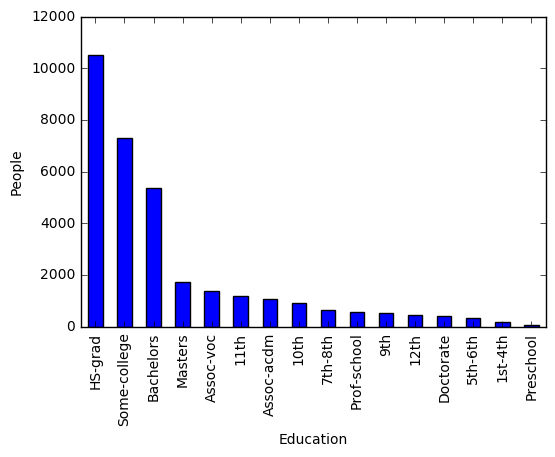

In [35]:
data.education.value_counts().plot(kind='bar')
plt.xlabel('Education')
plt.ylabel('People')

# Вопрос 5

Найти среднее и стандартное отклонение переменной "final weight" (fnlwgt) для разведённых людей?

In [94]:
print('Среднее:',round(data[data['marital-status']=='Divorced']['fnlwgt'].mean(),2),';'
     'Стандартное отклонение:',round(data[data['marital-status']=='Divorced']['fnlwgt'].std(),2))

Среднее: 185802.79 ;Стандартное отклонение: 105646.79


# Вопрос 6

Правда ли, что люди, зарабатывающие более 50 тыс. в основном имеют высшее образование?


In [25]:
print('Доля людей с высшим образованием, получающих больше 50K $', round(len(data[(data['50K']=='>50K')&((data['education']=='Bachelors')|(data['education']=='Masters')|(data['education']=='Doctorate'))])/len(data[data['50K']=='>50K'])*100,2),'%.Следовательно, в основном - нет.')

Доля людей с высшим образованием, получающих больше 50K $ 44.46 %.Следовательно, в основном - нет.


# Вопрос 7

Каков максимальный возраст мужчин и женщин каждой расы?

In [118]:
print('Таблица, описывающая максимальный возраст мужчины и женщины каждой расы, а также количество человек:')
pd.DataFrame(data.groupby(['race','sex'])['age'].nlargest(1))

Таблица, описывающая максимальный возраст мужчины и женщины каждой расы, а также количество человек:


age
race               sex              
Amer-Indian-Eskimo Female 19515   80
                   Male   12492   82
Asian-Pac-Islander Female 9147    75
                   Male   2303    90
Black              Female 19212   90
                   Male   222     90
Other              Female 26503   74
                   Male   12670   77
White              Female 1040    90
                   Male   1935    90

# Вопрос 8 

Люди из каких стран работают как фермеры/рыбаки?


In [128]:
for i in data[data['occupation']=='Farming-fishing']['native-country'].value_counts().index.tolist():
    print('Люди из', i, 'работают как фермеры-рыбаки')

Люди из United-States работают как фермеры-рыбаки
Люди из Mexico работают как фермеры-рыбаки
Люди из ? работают как фермеры-рыбаки
Люди из Puerto-Rico работают как фермеры-рыбаки
Люди из Philippines работают как фермеры-рыбаки
Люди из Guatemala работают как фермеры-рыбаки
Люди из Canada работают как фермеры-рыбаки
Люди из Italy работают как фермеры-рыбаки
Люди из El-Salvador работают как фермеры-рыбаки
Люди из Cuba работают как фермеры-рыбаки
Люди из Vietnam работают как фермеры-рыбаки
Люди из Ireland работают как фермеры-рыбаки
Люди из Cambodia работают как фермеры-рыбаки
Люди из Portugal работают как фермеры-рыбаки
Люди из England работают как фермеры-рыбаки
Люди из Yugoslavia работают как фермеры-рыбаки
Люди из Hong работают как фермеры-рыбаки
Люди из Japan работают как фермеры-рыбаки
Люди из France работают как фермеры-рыбаки
Люди из Germany работают как фермеры-рыбаки
Люди из Poland работают как фермеры-рыбаки


# Вопрос 9

Рассмотрим два отношения 1) количество мужчин-бакалавров к количеству мужчин-магистров и 2) количество женщин-бакалавров к количеству женщин-магистров. Какое отношение больше?

In [166]:
print('Количество мужчин бакалаврорв к магистрам:',round(data[(data['sex']=='Male')&(data['education']=='Bachelors')].count()[0]/data[(data['sex']=='Male')&(data['education']=='Masters')].count()[0],2))
print('Количество женщин бакалавров к магистрам:',round(data[(data['sex']=='Female')&(data['education']=='Bachelors')].count()[0]/data[(data['sex']=='Female')&(data['education']=='Masters')].count()[0],2))

Количество мужчин бакалаврорв к магистрам: 3.15
Количество женщин бакалавров к магистрам: 3.02


# Вопрос 10

Каково максимальное количество рабочих часов в неделю? Как много людей работают столько часов в неделю? Каков их заработок?

In [181]:
print('Максимальное количество рабочих часов:',data['hours-per-week'].max(),'часов')
print('Их заработок:',      list(data[data['hours-per-week']==data['hours-per-week'].max()]['hours-per-week'].value_counts())[0],'$')

Максимальное количество рабочих часов: 99 часов
Их заработок: 85 $
